In [29]:
text = "The sequel, Yes, Prime Minister, ran from 1986 to 1988. In total there were 38 episodes, of which all but one lasted half an hour. Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker. Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013."
text = "In line with our findings in patients, a previous study found decreased levels of 18:0-LPC in mice with NASH"

In [30]:
text

'In line with our findings in patients, a previous study found decreased levels of 18:0-LPC in mice with NASH'

In [2]:
import spacy

In [3]:
nlp = spacy.load('en_ner_bc5cdr_md')

/home/data/t200404/software/anaconda3/envs/python37_tsf_3/lib/python3.7/site-packages/spacy/language.py:2196: FutureWarning: Possible set union at position 6328
  p, exclude=["vocab"]


用nlp模型分析文本text，将结果命名为doc

In [33]:
doc = nlp(text)

In [34]:
doc

In line with our findings in patients, a previous study found decreased levels of 18:0-LPC in mice with NASH

好像跟刚才的text内容没有区别呀？不还是这段文本吗？别着急，Spacy只是为了让我们看着舒服，所以只打印出来文本内容。

其实，它在后台，已经对这段话进行了许多层次的分析。

不信？ 我们来试试，让Spacy帮我们分析这段话中出现的全部词例（token）。

In [35]:
for token in doc:
    print('"  ' + token.text + '  "')

"  In  "
"  line  "
"  with  "
"  our  "
"  findings  "
"  in  "
"  patients  "
"  ,  "
"  a  "
"  previous  "
"  study  "
"  found  "
"  decreased  "
"  levels  "
"  of  "
"  18:0-LPC  "
"  in  "
"  mice  "
"  with  "
"  NASH  "


# 1. 词性分析
**除了词例内容本身，Spacy还把每个词例的一些属性信息，进行了处理。**   
**下面，我们只对前10个词例（token），输出以下内容：**

- 文本
- 索引值（即在原文中的定位）
- 词元(lemma)
- 是否为标点符号
- 是否为空格
- 词性
- 标记

In [36]:
for token in doc[:10]:
    print("{0}\t\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_
    ))

In		0	in	False	False	Xx	ADP	IN
line		3	line	False	False	xxxx	NOUN	NN
with		8	with	False	False	xxxx	ADP	IN
our		13	our	False	False	xxx	PRON	PRP$
findings		17	finding	False	False	xxxx	NOUN	NNS
in		26	in	False	False	xx	ADP	IN
patients		29	patient	False	False	xxxx	NOUN	NNS
,		37	,	True	False	,	PUNCT	,
a		39	a	False	False	x	DET	DT
previous		41	previous	False	False	xxxx	ADJ	JJ


    
---
# 2. 命名实体识别
**下面我们不再考虑全部词性，只关注文本中出现的实体（entity）词汇**


In [37]:
for ent in doc.ents:
    print(ent.text, ent.label_)

NASH DISEASE


In [38]:
doc.ents

(NASH,)

**在这一段文字中，出现的实体包括日期、时间、基数（Cardinal）……Spacy不仅自动识别出了Jim Hacker为人名，还正确判定BBC Radio和UKTV Gold为机构名称。**

如果你平时的工作，需要从海量评论里筛选潜在竞争产品或者竞争者，那看到这里，有没有一点儿灵感呢？

执行下面这段代码，看看会发生什么：

In [39]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

**如上图所示，Spacy帮我们把实体识别的结果，进行了直观的可视化。不同类别的实体，还采用了不同的颜色加以区分。**

---
###  **把一段文字拆解为语句，对Spacy而言，也是小菜一碟。**

In [40]:
for sent in doc.sents:
    print(sent)

In line with our findings in patients, a previous study found decreased levels of 18:0-LPC in mice with NASH


---
**注意这里，doc.sents并不是个列表类型，而是一个生成器 generator **    
**所以，假设我们需要从中筛选出某一句话，需要先将其转化为列表。**

In [41]:
doc.sents

In [42]:
list(doc.sents)

[In line with our findings in patients, a previous study found decreased levels of 18:0-LPC in mice with NASH]

------
# 3. 语法 --- 依赖关系刻画

下面要展示的功能，分析范围局限在第一句话。

我们将其抽取出来，并且重新用nlp模型处理，存入到新的变量newdoc中。

In [43]:
newdoc = nlp(list(doc.sents)[0].text)

In [44]:
newdoc

In line with our findings in patients, a previous study found decreased levels of 18:0-LPC in mice with NASH

**对这一句话，我们想要搞清其中每一个词例（token）之间的依赖关系。**

In [45]:
for token in newdoc:
    print("{0}({1}) <--{2}-- {3}({4})".format(
        token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))

In(IN) <--case-- line(NN)
line(NN) <--nmod-- found(VBD)
with(IN) <--case-- findings(NNS)
our(PRP$) <--nmod:poss-- findings(NNS)
findings(NNS) <--nmod-- line(NN)
in(IN) <--case-- patients(NNS)
patients(NNS) <--nmod-- findings(NNS)
,(,) <--punct-- found(VBD)
a(DT) <--det-- study(NN)
previous(JJ) <--amod-- study(NN)
study(NN) <--nsubj-- found(VBD)
found(VBD) <--ROOT-- found(VBD)
decreased(VBN) <--amod-- levels(NNS)
levels(NNS) <--dobj-- found(VBD)
of(IN) <--case-- 18:0-LPC(JJ)
18:0-LPC(JJ) <--nmod-- levels(NNS)
in(IN) <--case-- mice(NNS)
mice(NNS) <--nmod-- levels(NNS)
with(IN) <--case-- NASH(NN)
NASH(NN) <--nmod-- levels(NNS)


### 词性依赖关系可视化
**很清晰，但是列表的方式，似乎不大直观。那就让Spacy帮我们可视化吧。**

In [46]:
displacy.render(newdoc, style='dep', jupyter=True, options={'distance': 90})

### 分析：
这些依赖关系链接上的词汇，都代表什么？

如果你对语言学比较了解，应该能看懂。

不懂？查查字典嘛。

跟语法书对比一下，看看Spacy分析得是否准确。

前面我们分析的，属于语法层级。

---

# 4. 语义 --- 词向量的近似度计算

下面我们看语义。

我们利用的工具，叫做词嵌入（word embedding）模型。
   
   
例如给你下面这个式子：

** ? - woman = king - queen**

只要你学过英语，就不难猜到这里大概率应该填写“**man**”。

但是，如果你只是用了随机的序号来代表词汇，又如何能够猜到这里正确的填词结果呢？

幸好，在深度学习领域，我们可以使用更为顺手的单词向量化工具——**词嵌入（word embeddings ）**。
   
###  使用词嵌入模型，我们需要Spacy读取一个新的文件。

In [48]:
# nlp = spacy.load('en_core_web_lg')
nlp.vocab['minister'].vector   # 打印“minister”这个单词对应的向量取值。可以看到，每个单词，用总长度为300的浮点数组成向量来表示。

array([ 0.086573  , -0.171844  , -0.0598821 , -0.305533  ,  0.307936  ,
        0.0355545 ,  0.105116  , -0.224435  , -0.311538  ,  0.0678949 ,
        0.210352  , -0.598067  , -0.0537795 ,  0.0368432 ,  0.00238259,
        0.0607405 ,  0.219176  ,  0.1285    ,  0.136532  , -0.262734  ,
        0.0633927 ,  0.303448  ,  0.339773  , -0.0648957 , -0.40234   ,
       -0.124053  ,  0.118384  ,  0.275841  , -0.396812  ,  0.0730387 ,
        0.371536  , -0.227171  , -0.519334  , -0.400849  ,  0.120455  ,
        0.455942  , -0.0790584 ,  0.249116  , -0.0663053 , -0.135667  ,
        0.10713   ,  0.337216  , -0.284948  ,  0.281498  ,  0.199146  ,
        0.367287  , -0.40139   ,  0.111533  , -0.23294   ,  0.022261  ,
        0.0603481 ,  0.0824842 , -0.039958  ,  0.504614  , -0.159134  ,
        0.199793  , -0.363533  ,  0.352513  ,  0.424153  , -0.0756336 ,
        0.0524466 , -0.240301  ,  0.150358  ,  0.365029  , -0.241122  ,
       -0.279777  , -0.180369  , -0.388211  , -0.0496945 ,  0.68

Spacy读入的这个模型，是采用**word2vec**，在海量语料上训练的结果。


我们来看看，此时Spacy的**语义近似度**判别能力。

这里，我们将4个变量，赋值为对应单词的向量表达结果。

In [49]:
dog = nlp.vocab["dog"]
cat = nlp.vocab["cat"]
apple = nlp.vocab["apple"]
orange = nlp.vocab["orange"]

In [50]:
dog.similarity(cat)  # 都是宠物，近似度高，可以接受

0.6909422874450684

In [51]:
dog.similarity(apple)  # 一个动物，一个水果，近似度一下子就跌落下来了

0.2236175835132599

In [52]:
dog.similarity(orange)  # 相似度也不高

0.10750492662191391

In [53]:
apple.similarity(orange)  # 水果间近似度，远远超过水果与动物的相似程度

0.4399324655532837

测试通过。

看来Spacy利用词嵌入模型，对语义有了一定的理解。

---

下面为了好玩，我们来考考它。

这里，我们需要计算词典中可能不存在的向量，因此Spacy自带的**similarity()函数**，就显得不够用了。

我们从scipy中，找到相似度计算需要用到的**余弦函数**。

In [54]:
from scipy.spatial.distance import cosine

对比一下，我们直接代入“狗”和“猫”的向量，进行计算

In [55]:
1 - cosine(dog.vector, cat.vector)

0.6909422278404236

In [ ]:
除了保留数字外，计算结果与Spacy自带的similarity()运行结果没有差别。

我们把它做成一个小函数，专门处理向量输入。

In [56]:
def vector_similarity(x, y):
    return 1 - cosine(x, y)

In [57]:
vector_similarity(dog.vector, apple.vector)   # 测试一下“狗”和“苹果”

0.2236175835132599

与刚才的结果对比，也是一致的。

---
# 重点来了：  ? - woman = king - queen 
   
我们把问号，称为 **guess_word** 

In [58]:
def make_guess_word(words):
    [first, second, third] = words
    return nlp.vocab[first].vector - nlp.vocab[second].vector + nlp.vocab[third].vector

#### 下面的函数就比较暴力了，它其实是用我们计算的 guess_word 取值，和字典中全部词语一一核对近似性。把最为近似的10个候选单词打印出来。

In [59]:
def get_similar_word(words, scope=nlp.vocab):
    
    guess_word = make_guess_word(words)

    similarities = []

    for word in scope:
        if not word.has_vector:
            continue

        similarity = vector_similarity(guess_word, word.vector)
        similarities.append((word, similarity))


    similarities = sorted(similarities, key=lambda item: -item[1])
    print([word[0].text for word in similarities[:10]])

In [60]:
words = ["king", "queen", "woman"]
get_similar_word(words)

['woman', 'king', 'She', 'she', 'patients', 'who', 'he', 'He', 'Mont', 'Those']


原来字典里面，“男人”(man)这个词汇有这么多的变形啊。

---
但是这个例子太经典了，我们尝试个新鲜一些的：
###   ? - England = Paris - London
    
左侧国别，右侧首都，对应来看，自然是巴黎所在的法国（France）。

问题是，Spacy能猜对吗？

In [61]:
words = ["Paris", "London", "England"]
get_similar_word(words)

['England', 'Paris', 'Mich', 'Okla.', 'Pa.', 'Conn.', 'Colo.', 'Nev', 'Cuz', 'Doin']


结果很令人振奋，前三个都是“法国”（France）。

--- 

# 5. 词向量降维和可视化
下面我们做一个更有趣的事儿，把词向量的300维的高空间维度，压缩到一张纸（二维）上，看看词语之间的相对位置关系。

In [62]:
import numpy as np
embedding = np.array([])  # 把词嵌入矩阵先设定为空。一会儿慢慢填入。
word_list = []            # 需要演示的单词列表，也先空着。

再次让Spacy遍历“Yes, Minister”维基页面中摘取的那段文字，加入到单词列表中。注意这次我们要进行判断：

- 如果是标点，丢弃；
- 如果词汇已经在词语列表中，丢弃。

In [63]:
for token in doc:
    if not(token.is_punct) and not(token.text in word_list):
        word_list.append(token.text)

In [106]:
word_list

['The',
 'sequel',
 'Yes',
 'Prime',
 'Minister',
 'ran',
 'from',
 '1986',
 'to',
 '1988',
 'In',
 'total',
 'there',
 'were',
 '38',
 'episodes',
 'of',
 'which',
 'all',
 'but',
 'one',
 'lasted',
 'half',
 'an',
 'hour',
 'Almost',
 'ended',
 'with',
 'a',
 'variation',
 'the',
 'title',
 'series',
 'spoken',
 'as',
 'answer',
 'question',
 'posed',
 'by',
 'same',
 'character',
 'Jim',
 'Hacker',
 'Several',
 'adapted',
 'for',
 'BBC',
 'Radio',
 'and',
 'stage',
 'play',
 'was',
 'produced',
 'in',
 '2010',
 'latter',
 'leading',
 'new',
 'television',
 'on',
 'UKTV',
 'Gold',
 '2013']

检查了一下，一长串（63个）词语列表中，没有出现标点。一切正常。

下面，我们把每个词汇对应的空间向量，追加到词嵌入矩阵中。

In [64]:
for word in word_list:
    embedding = np.append(embedding, nlp.vocab[word].vector)
embedding.shape

(3400,)

可以看到，所有的向量内容，都被放在了一个长串上面。这显然不符合我们的要求，我们将不同的单词对应的词向量，拆解到不同行上面去。

In [65]:
embedding = embedding.reshape(len(word_list), -1)  # 将不同的单词对应的词向量，拆解到不同行上面去
embedding.shape    # 变换后词嵌入矩阵的维度

(17, 200)

63个词汇，每个为长度300的向量，这就对了。

---

In [66]:
from sklearn.manifold import TSNE # 读入TSNE模块
tsne = TSNE()   # tsne的作用，是把高维度的词向量（300维）压缩到二维平面上。我们执行这个转换过程：

low_dim_embedding = tsne.fit_transform(embedding)

/home/data/t200404/software/anaconda3/envs/python37_tsf_3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/data/t200404/software/anaconda3/envs/python37_tsf_3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [68]:
import matplotlib.pyplot as plt    # 用matplotlib 将二维降维后的词向量们画出来
%pylab inline   

Populating the interactive namespace from numpy and matplotlib


/home/data/t200404/software/anaconda3/envs/python37_tsf_3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [70]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.pdf'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)

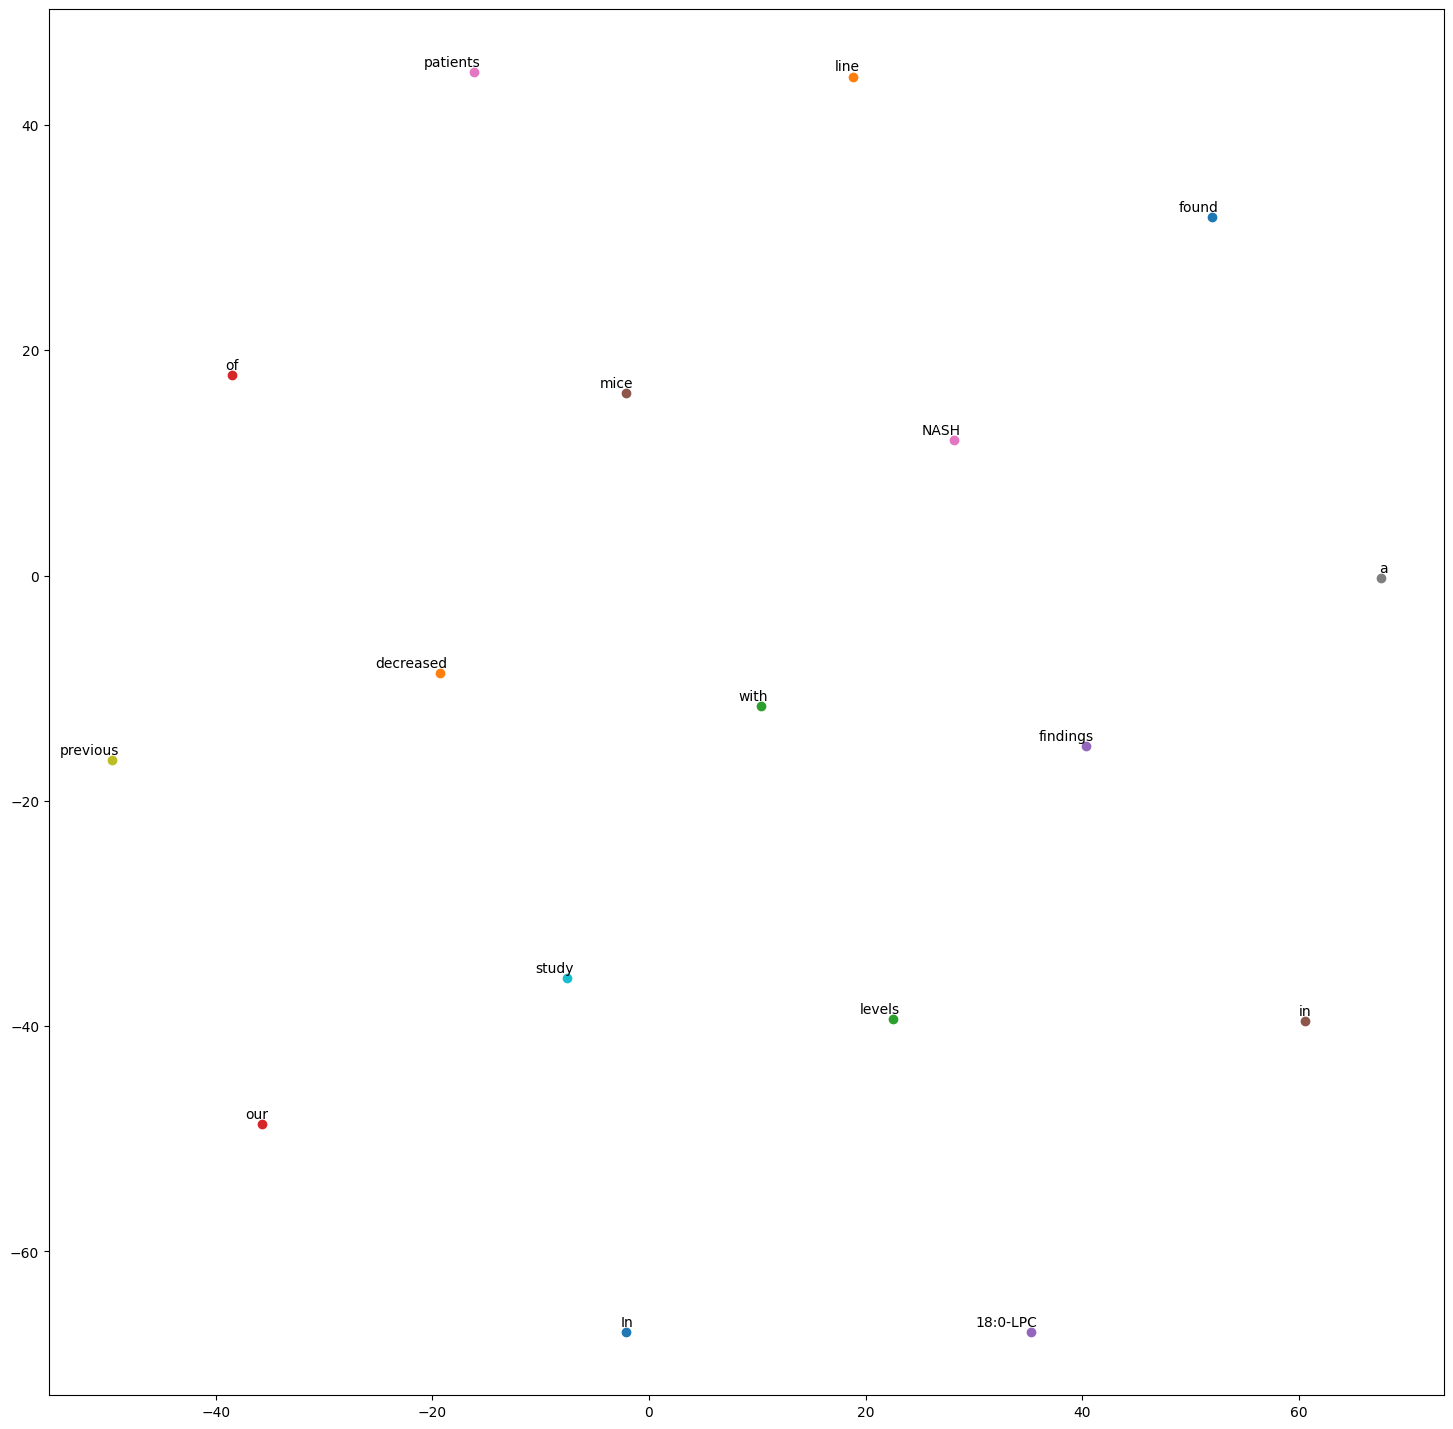

In [73]:
plot_with_labels(low_dim_embedding, word_list)

请注意观察图中的几个部分：

年份

同一单词的大小写形式

Radio 和 television

a 和 an

看看有什么规律没有？

我发现了一个有意思的现象——每次运行tsne，产生的二维可视化图都不一样！

不过这也正常，因为这段话之中出现的单词，并非都有预先训练好的向量。

这样的单词，被Spacy进行了随机化等处理。

因此，每一次生成高维向量，结果都不同。不同的高维向量，压缩到二维，结果自然也会有区别。

问题来了，如果我希望每次运行的结果都一致，该如何处理呢？

这个问题，作为课后思考题，留给你自行解答。

细心的你可能发现了，执行完最后一条语句后，页面左侧边栏文件列表中，出现了一个新的pdf文件。

In [77]:
import pandas as pd

df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5
